<a href="https://colab.research.google.com/github/karahanmerves/lattice_new/blob/main/lattice_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#"LATTİCE PARAMETER OPTİMİZATİON"
**WITH MULTIPLE REGRESSION**




##Import to Librarys


In [72]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
#% matplotlib inline


##Download Data (format CSV)

In [73]:
dt = pd.read_csv('/content/suspension_lower_data.csv')
dt.head(10)

,target lenght,min diameter(mm),max diameter(mm),factor of safety,max von-mises stress(Mpa),max displacement (mm),mass(kg),force(N)
0,35.0,3.0,8.0,4.4,49.17,0.1121,1.363,3000
1,8.0,6.0,13.0,6.1,35.17,0.7884,2.324,3000
2,10.0,3.0,6.0,4.5,47.57,0.7400,1.762,3000
3,12.0,2.0,5.0,3.5,61.00,0.5500,2.081,3000
4,15.0,1.0,3.0,2.8,76.57,0.4667,1.263,3000
5,20.0,1.0,6.0,3.1,69.10,0.5475,1.251,3000
6,30.0,4.0,8.0,5.5,38.86,0.1985,1.500,3000
7,40.0,2.0,5.0,3.4,63.40,0.2325,1.283,3000
8,16.0,2.5,8.0,4.1,52.10,0.1285,1.421,3000
9,28.0,7.0,15.0,7.8,27.50,0.0750,1.912,3000


In [74]:
dt = dt.sample(frac=1, random_state=0).reset_index(drop=True)

In [75]:
dt.head(10)

,target lenght,min diameter(mm),max diameter(mm),factor of safety,max von-mises stress(Mpa),max displacement (mm),mass(kg),force(N)
0,11.5,2.5,8.0,6.2,34.9400,0.0830,1.495,2000
1,30.0,2.0,4.0,12.1,0.0400,17.8400,1.300,1000
2,10.0,3.0,6.0,4.5,47.5700,0.7400,1.762,3000
3,10.0,3.0,6.0,3.8,56.9300,0.1447,1.700,4000
4,42.0,5.0,10.0,3.9,0.1668,55.6900,1.539,5000
5,23.0,2.0,5.0,11.2,0.0430,19.1500,1.314,1000
6,3.0,1.0,2.0,4.2,51.7100,0.1314,1.648,3000
7,23.0,2.0,7.0,2.2,0.2140,95.7200,1.314,5000
8,18.0,2.2,5.4,2.9,74.2500,0.1753,1.363,4000
9,40.0,3.0,8.0,12.9,0.0400,16.6800,1.347,1000


In [76]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   target lenght              100 non-null    float64
 1   min diameter(mm)           100 non-null    float64
 2   max diameter(mm)           100 non-null    float64
 3   factor of safety           100 non-null    float64
 4   max von-mises stress(Mpa)  100 non-null    float64
 5   max displacement (mm)      100 non-null    float64
 6   mass(kg)                   100 non-null    float64
 7   force(N)                   100 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 6.4 KB


## Checking the Number of Null Values in the Dataset

In [77]:
dt.isnull().sum()

target lenght                0
min diameter(mm)             0
max diameter(mm)             0
factor of safety             0
max von-mises stress(Mpa)    0
max displacement (mm)        0
mass(kg)                     0
force(N)                     0
dtype: int64

In [78]:
dt.describe()

,target lenght,min diameter(mm),max diameter(mm),factor of safety,max von-mises stress(Mpa),max displacement (mm),mass(kg),force(N)
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,20.360000,2.900000,7.633000,5.744000,27.278287,24.173522,1.528800,3000.000000
std,12.794427,2.080501,4.481411,3.555145,29.257588,35.946385,0.277489,1421.338109
min,3.000000,0.200000,1.400000,1.300000,0.030000,0.050000,1.230000,1000.000000
25%,10.000000,1.000000,4.000000,3.100000,0.147975,0.120500,1.298000,2000.000000
50%,18.000000,2.200000,7.000000,4.550000,22.325000,0.418350,1.418000,3000.000000
75%,30.000000,4.000000,10.000000,7.650000,47.970000,37.482500,1.695000,4000.000000
max,50.000000,10.000000,20.000000,18.300000,102.400000,166.900000,2.373000,5000.000000


##Correlation Diamgram

<Axes: >

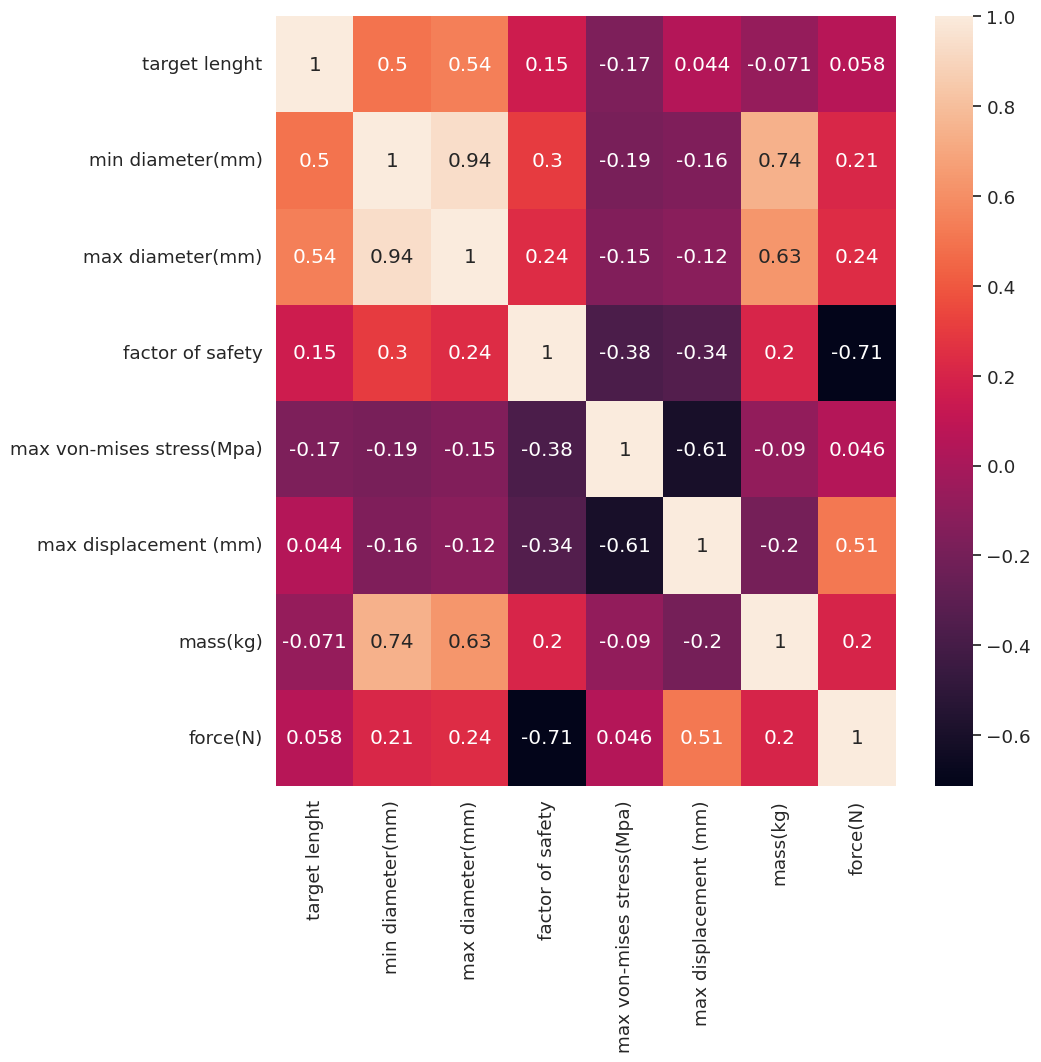

In [79]:
from matplotlib.cm import scale
corr = dt.corr()
sns.heatmap(corr, annot = True)




##Data Visualization





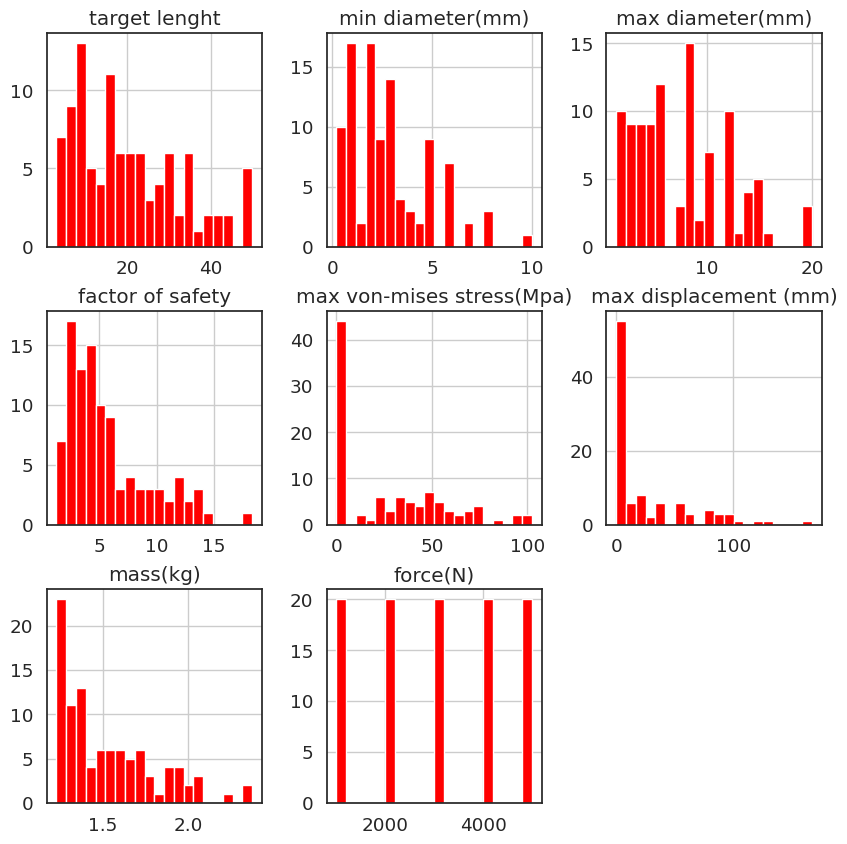

In [80]:
sns.set(style='white',font_scale=1.2, rc={'figure.figsize':(10,10)})
ax=dt.hist(bins=20,color='red' )

#Correlations Scatter Plot 

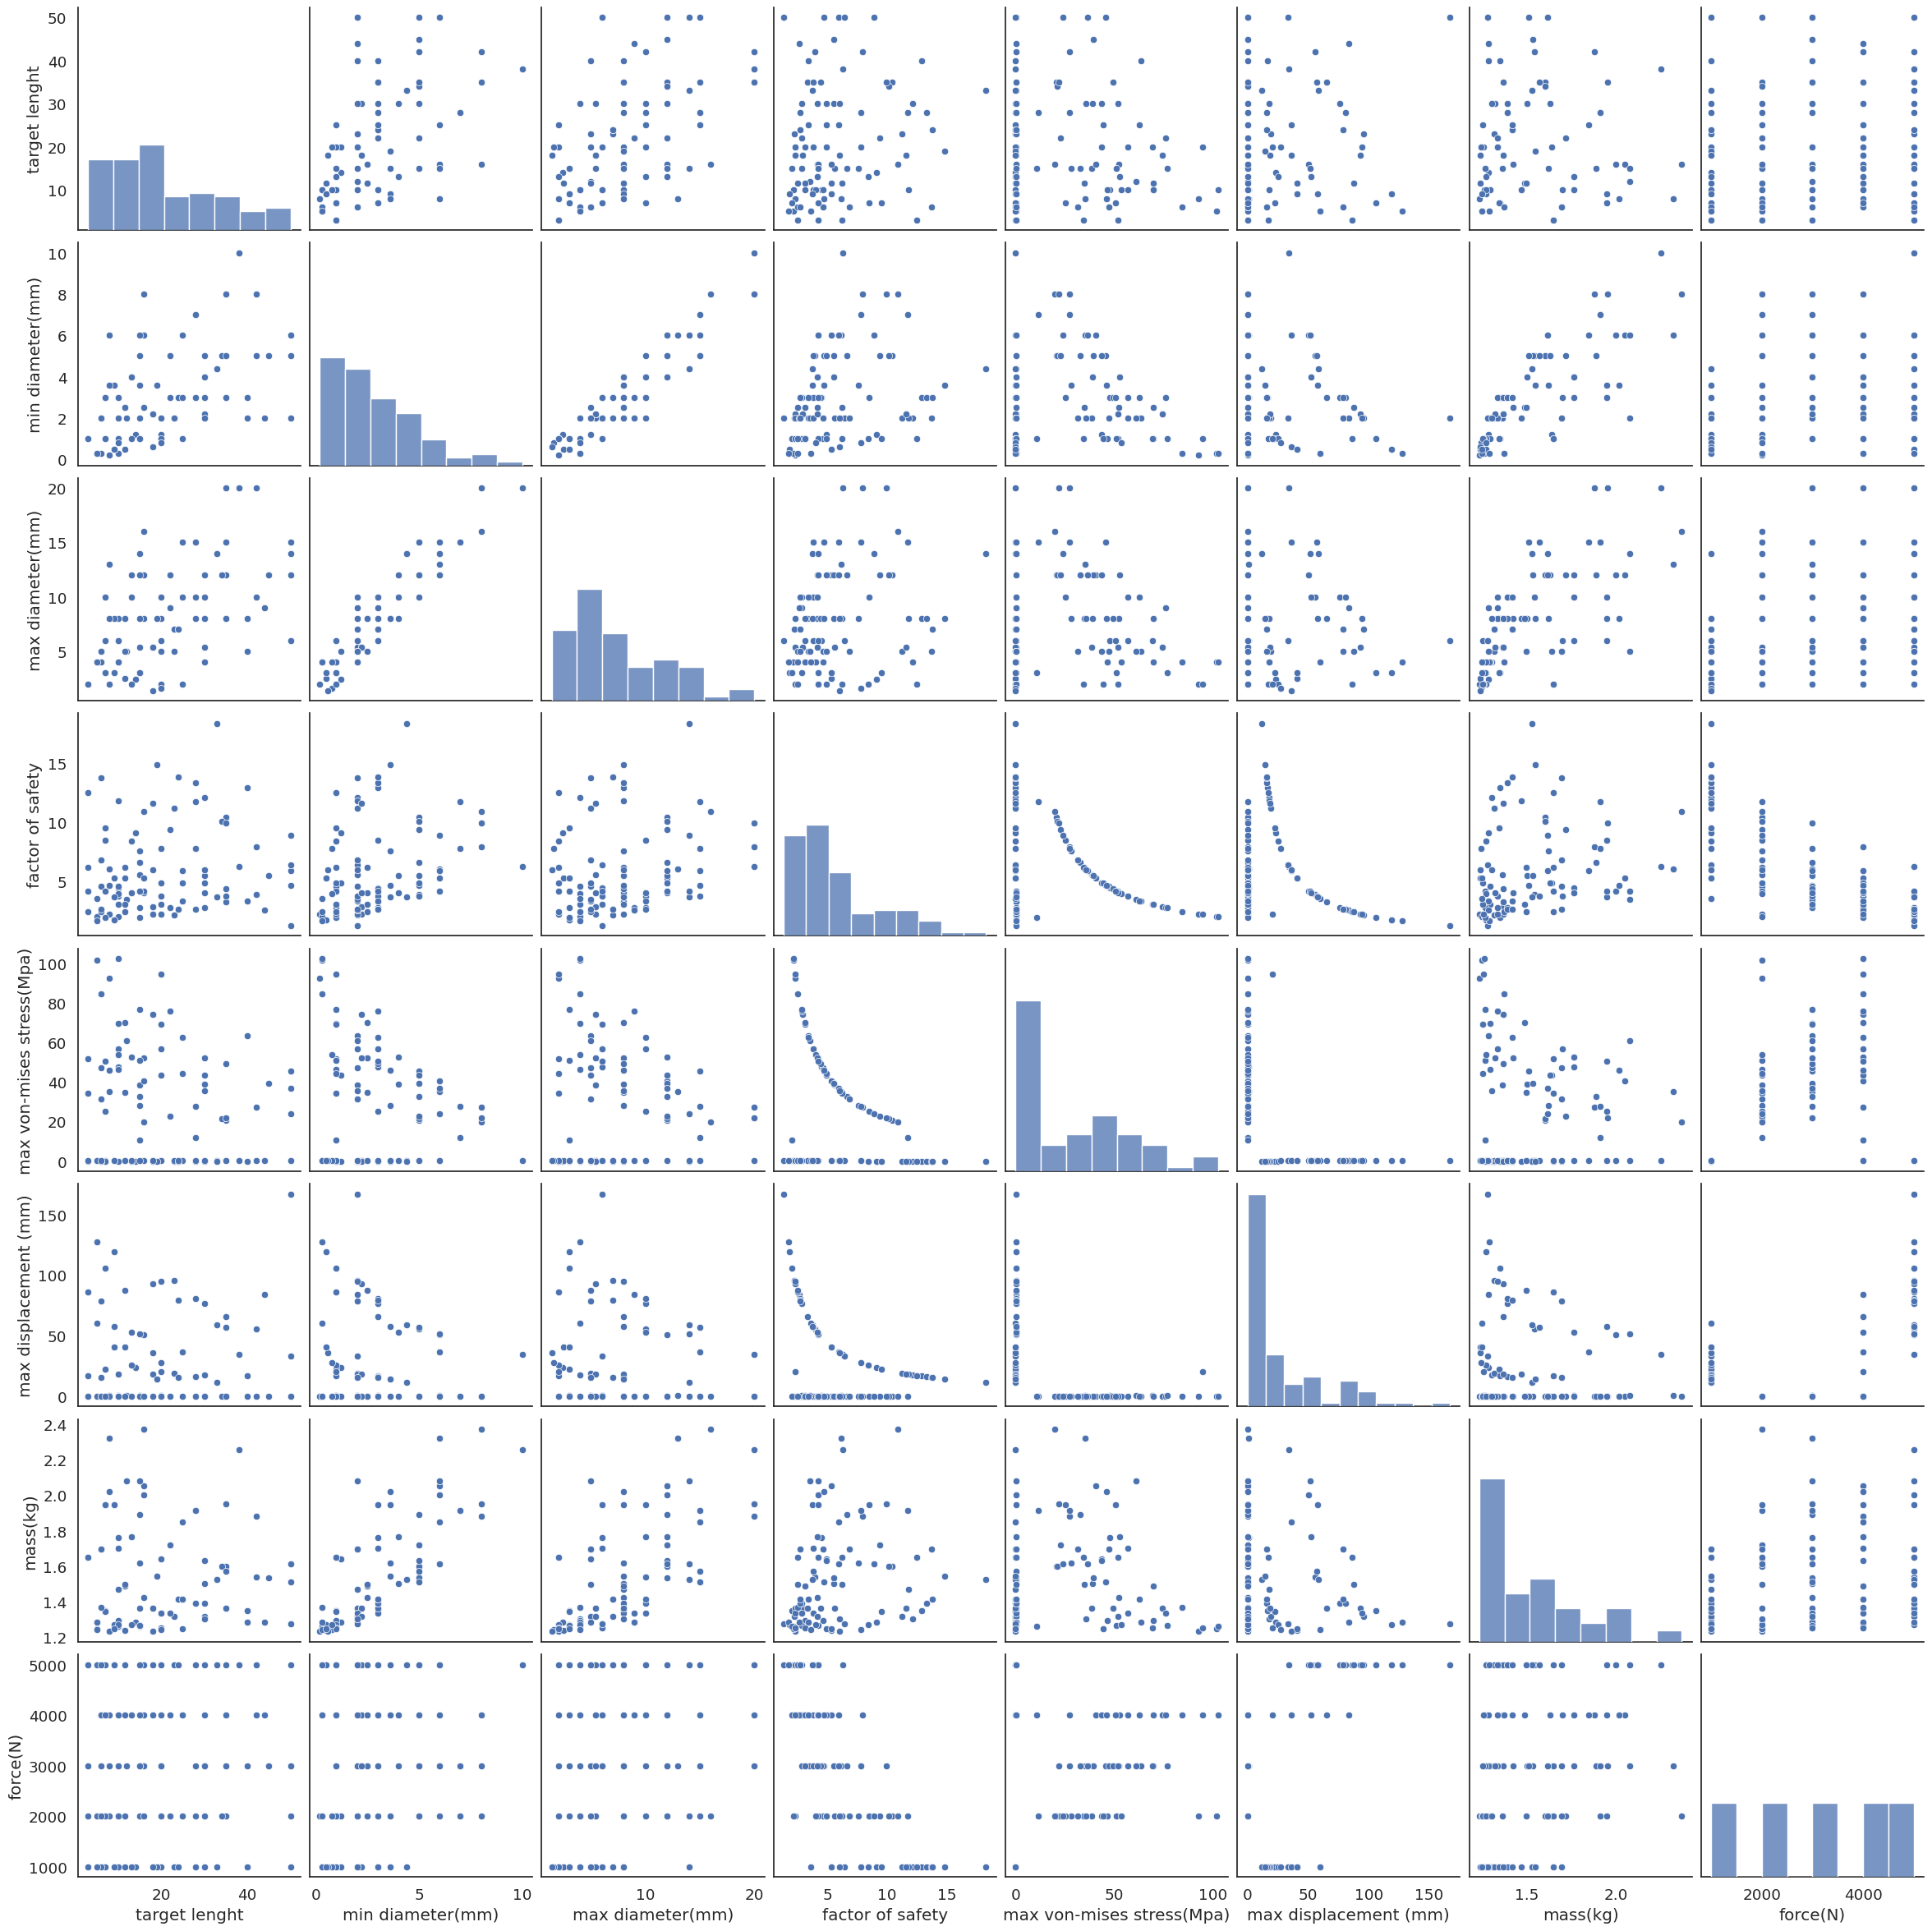

In [81]:
sns.pairplot(dt, height=3)

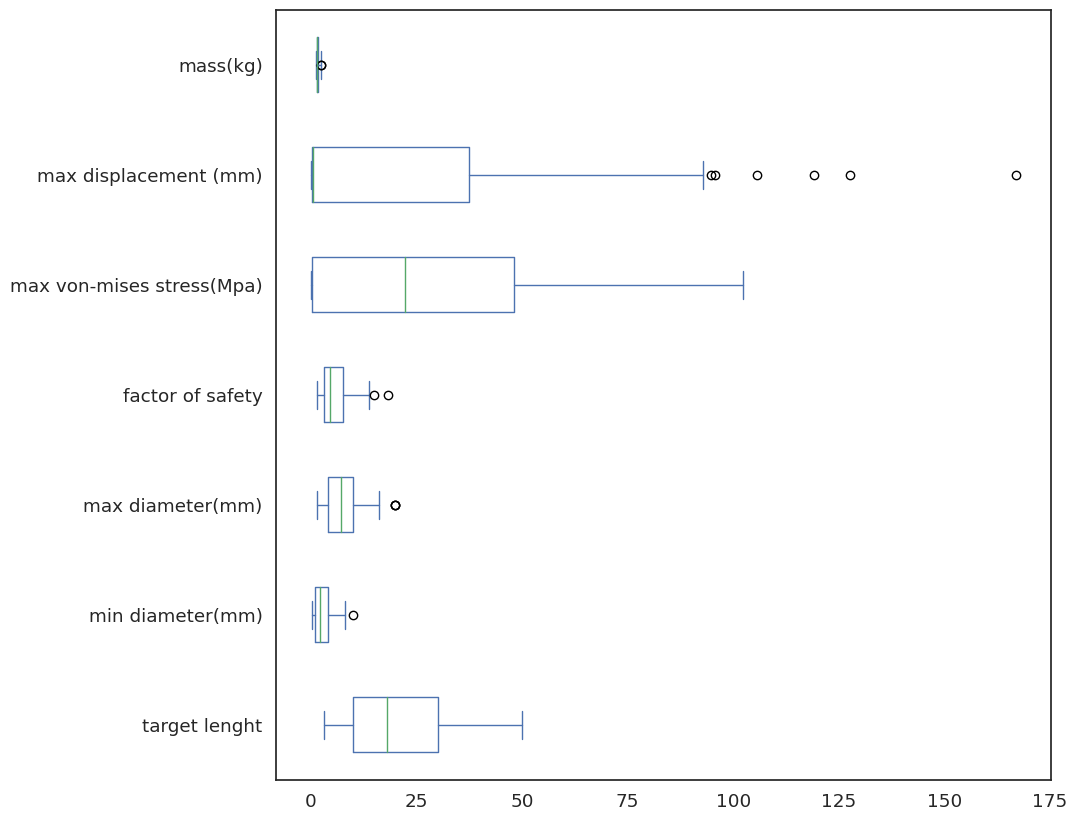

In [82]:
dt2=dt.drop('force(N)',axis=1)
dt2.plot(kind='box', vert=False, figsize=(10, 10))
plt.show()


In [83]:
Q1 = dt.quantile(0.25)
Q3 = dt.quantile(0.75)
IQR = Q3 - Q1

alt_sinir = Q1 - 1.5*IQR
ust_sinir = Q3 + 1.5*IQR

dt = dt[(dt >= alt_sinir) & (dt <= ust_sinir)]


In [105]:
dt = dt.dropna()

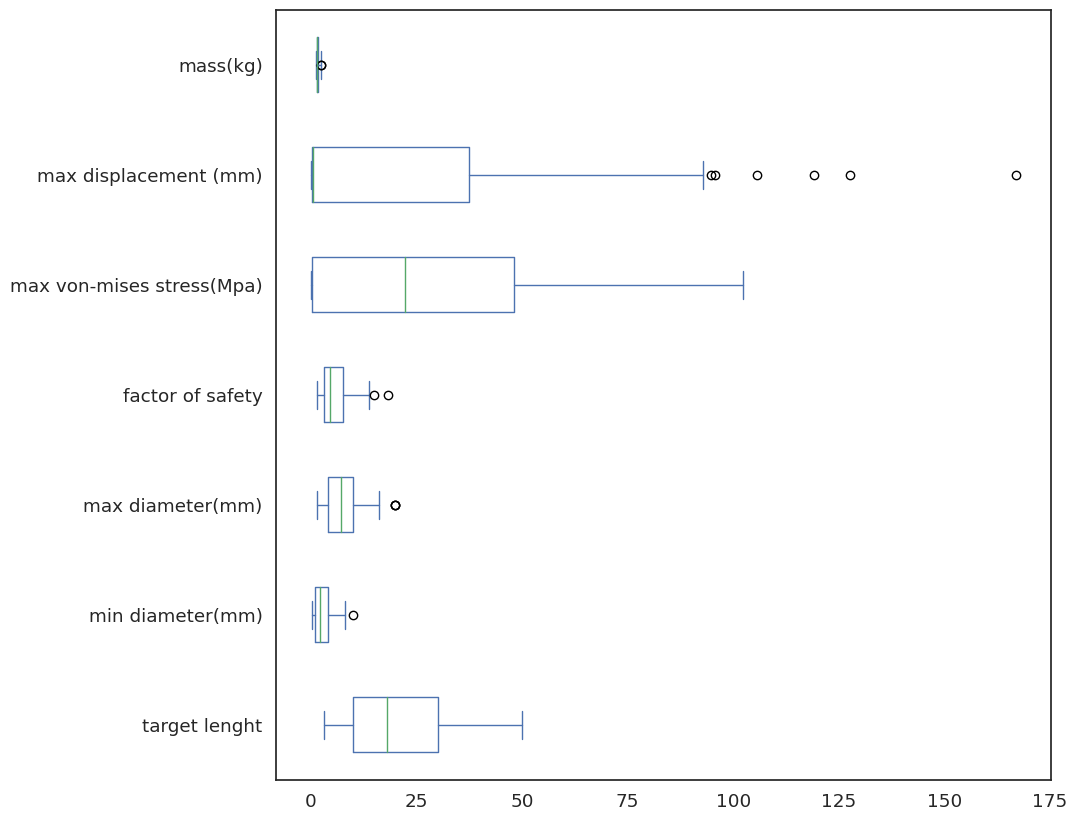

In [106]:
dt2.plot(kind='box', vert=False, figsize=(10, 10))
plt.show()

In [107]:
dt.isnull().sum()

target lenght                0
min diameter(mm)             0
max diameter(mm)             0
factor of safety             0
max von-mises stress(Mpa)    0
max displacement (mm)        0
mass(kg)                     0
force(N)                     0
dtype: int64

In [108]:
#from sklearn.impute import KNNImputer

#imputer = KNNImputer(n_neighbors=3)
#dt1= imputer.fit_transform(dt)

In [109]:
#dt = pd.DataFrame(dt1, columns=dt.columns)

# Sample Replication with "Boostrap Method"

In [110]:
#bootstrap_sample = dt.sample(n=1000, replace=True)
#dt = pd.concat([dt, bootstrap_sample])

In [111]:
#dt

##Correlation Diagram After Boostrap

In [112]:
#from matplotlib.cm import scale
#corr = dt.corr()
#sns.heatmap(corr, annot = True)

#Target Feature Separation

In [113]:
X = dt.drop(['target lenght',	'min diameter(mm)',	'max diameter(mm)'], axis = 1)
y1=dt['target lenght']
y2=dt['min diameter(mm)']
y3=dt['max diameter(mm)']

In [114]:
X

,factor of safety,max von-mises stress(Mpa),max displacement (mm),mass(kg),force(N)
0,6.2,34.9400,0.0830,1.495,2000
1,12.1,0.0400,17.8400,1.300,1000
2,4.5,47.5700,0.7400,1.762,3000
3,3.8,56.9300,0.1447,1.700,4000
4,3.9,0.1668,55.6900,1.539,5000
...,...,...,...,...,...
95,5.3,0.0580,40.9500,1.245,1000
96,3.7,0.1548,57.9500,1.947,5000
97,2.7,0.1922,78.6000,1.696,5000
98,4.7,46.1400,0.1212,2.020,4000


# Feature Shape Control

In [115]:
y1.shape,X.shape

((87,), (87, 5))

In [116]:
y2.shape,X.shape

((87,), (87, 5))

In [117]:
y3.shape,X.shape

((87,), (87, 5))

#Feature Visualization 

First 5 lines for feature 'Stress' and 'max diameter' 

In [118]:
X.head()

,factor of safety,max von-mises stress(Mpa),max displacement (mm),mass(kg),force(N)
0,6.2,34.9400,0.0830,1.495,2000
1,12.1,0.0400,17.8400,1.300,1000
2,4.5,47.5700,0.7400,1.762,3000
3,3.8,56.9300,0.1447,1.700,4000
4,3.9,0.1668,55.6900,1.539,5000


In [119]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


#Split

Train Test Split for 'Stress'

In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=42,)
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state=42,)
X_train, X_test, y3_train, y3_test = train_test_split(X, y3, test_size=0.2, random_state=42,)

In [121]:
X_train, X_val, y1_train, y1_val, y2_train, y2_val, y3_train, y3_val = train_test_split(X_train, y1_train, y2_train, y3_train, test_size=0.2, random_state=42)

In [122]:
# Her bir setin boyutları kontrol edilir
print("Train 1 set boyutu: ", X_train.shape, y1_train.shape)
print("Validation 1 set boyutu: ", X_val.shape, y1_val.shape)
print("Test 1 set boyutu: ", X_test.shape, y1_test.shape)

print("Train 2 set boyutu: ", X_train.shape, y2_train.shape)
print("Validation 2 set boyutu: ", X_val.shape, y2_val.shape)
print("Test 2 set boyutu: ", X_test.shape, y2_test.shape)

print("Train 3 set boyutu: ", X_train.shape, y3_train.shape)
print("Validation 3 set boyutu: ", X_val.shape, y3_val.shape)
print("Test 3 set boyutu: ", X_test.shape, y3_test.shape)

Train 1 set boyutu:  (55, 5) (55,)
Validation 1 set boyutu:  (14, 5) (14,)
Test 1 set boyutu:  (18, 5) (18,)
Train 2 set boyutu:  (55, 5) (55,)
Validation 2 set boyutu:  (14, 5) (14,)
Test 2 set boyutu:  (18, 5) (18,)
Train 3 set boyutu:  (55, 5) (55,)
Validation 3 set boyutu:  (14, 5) (14,)
Test 3 set boyutu:  (18, 5) (18,)


#Normalization Scaler

In [123]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [124]:
X_train.shape

(55, 5)

##Multioutput Regressor for Using Boostrap and RandomForest

In [125]:
model = RandomForestRegressor(n_estimators = 400, random_state =0)

# BaggingRegressor kullanarak MultiOutputRegressor modeli tanımlama
bagging_model = BaggingRegressor(base_estimator=model, n_estimators=10, random_state=0)

# MultiOutputRegressor kullanarak bootstrap yöntemini uygulama
bootstrap_model = MultiOutputRegressor(bagging_model)

# Eğitim verilerini kullanarak modeli eğitme
bootstrap_model.fit(X_train, np.column_stack((y1_train, y2_train,y3_train)))


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


MultiOutputRegressor(estimator=BaggingRegressor(base_estimator=RandomForestRegressor(n_estimators=400,
                                                                                     random_state=0),
                                                random_state=0))

##Predictiving to Target Features for RF

In [126]:
y_test_pred = bootstrap_model.predict(X_test)

In [127]:
y_val_pred= bootstrap_model.predict(X_val)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(


In [128]:
y1_test_pred, y2_test_pred,y3_test_pred = y_test_pred[:, 0], y_test_pred[:, 1],y_test_pred[:,2]

In [129]:
y1_val_pred, y2_val_pred,y3_val_pred = y_val_pred[:, 0], y_val_pred[:, 1],y_val_pred[:,2]

##Mean Square Error (MSE)

In [130]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [131]:
mse_y1_test = mean_squared_error(y1_test,y1_test_pred)
mse_y2_test = mean_squared_error(y2_test, y2_test_pred)
mse_y3_test = mean_squared_error(y3_test, y3_test_pred)

print(f"Y1 için MSE: {mse_y1_test:.2f}")
print(f"Y2 için MSE: {mse_y2_test:.2f}")
print(f"Y3 için MSE: {mse_y3_test:.2f}")

Y1 için MSE: 138.06
Y2 için MSE: 2.25
Y3 için MSE: 13.02


In [132]:
mse_y1_val = mean_squared_error(y1_val,y1_val_pred)
mse_y2_val = mean_squared_error(y2_val, y2_val_pred)
mse_y3_val = mean_squared_error(y3_val, y3_val_pred)
print(f"Y1 için MSE: {mse_y1_val:.2f}")
print(f"Y2 için MSE: {mse_y2_val:.2f}")
print(f"Y3 için MSE: {mse_y3_val:.2f}")

Y1 için MSE: 222.77
Y2 için MSE: 5.71
Y3 için MSE: 18.75


## R-Square Error (R²)

In [133]:
r2_y1 = r2_score(y1_test, y1_test_pred)
r2_y2 = r2_score(y2_test, y2_test_pred)
r2_y3 = r2_score(y3_test, y3_test_pred)
print(f"Y1 için R-kare: {r2_y1:.2f}")
print(f"Y2 için R-kare: {r2_y2:.2f}")
print(f"Y3 için R-kare: {r2_y3:.2f}")

Y1 için R-kare: -0.07
Y2 için R-kare: -0.12
Y3 için R-kare: -0.11


In [134]:
r2_y1 = r2_score(y1_val, y1_val_pred)
r2_y2 = r2_score(y2_val, y2_val_pred)
r2_y3 = r2_score(y3_val, y3_val_pred)
print(f"Y1 için R-kare: {r2_y1:.2f}")
print(f"Y2 için R-kare: {r2_y2:.2f}")
print(f"Y3 için R-kare: {r2_y3:.2f}")

Y1 için R-kare: -0.18
Y2 için R-kare: -0.37
Y3 için R-kare: -0.19



# MultiOutput Regressor for Using Gradient Boosting Regressor



In [135]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression as lr

In [136]:
from sklearn.ensemble import GradientBoostingRegressor
mor = GradientBoostingRegressor(n_estimators=100, max_depth=3, learning_rate=0.1)

In [137]:
#rf = RandomForestRegressor(n_estimators = 400, random_state =0)
#mor = MultiOutputRegressor(rf)

In [138]:
from sklearn.ensemble import GradientBoostingRegressor

params = {'n_estimators': 500,
          'max_depth': 5,
          'min_samples_split': 6,
          'learning_rate': 0.005,
          'loss': 'absolute_error'}

# Modeli oluşturma
gb_model = GradientBoostingRegressor(**params)



# Modeli eğitme

mor = MultiOutputRegressor(gb_model)
mor.fit(X_train, np.column_stack((y1_train, y2_train,y3_train)))


MultiOutputRegressor(estimator=GradientBoostingRegressor(learning_rate=0.005,
                                                         loss='absolute_error',
                                                         max_depth=5,
                                                         min_samples_split=6,
                                                         n_estimators=500))

##Predictiving to Target Features GB

In [139]:
y_test_pred = mor.predict(X_test)

In [140]:
y_val_pred= mor.predict(X_val)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


In [141]:
y1_test_pred, y2_test_pred,y3_test_pred = y_test_pred[:, 0], y_test_pred[:, 1],y_test_pred[:,2]

In [142]:
y1_val_pred, y2_val_pred,y3_val_pred = y_val_pred[:, 0], y_val_pred[:, 1],y_val_pred[:,2]

##Mean Square Error (MSE)

In [143]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [144]:
mse_y1_test = mean_squared_error(y1_test,y1_test_pred)
mse_y2_test = mean_squared_error(y2_test, y2_test_pred)
mse_y3_test = mean_squared_error(y3_test, y3_test_pred)

print(f"Y1 için MSE: {mse_y1_test:.2f}")
print(f"Y2 için MSE: {mse_y2_test:.2f}")
print(f"Y3 için MSE: {mse_y3_test:.2f}")

Y1 için MSE: 87.14
Y2 için MSE: 1.03
Y3 için MSE: 11.49


In [145]:
mse_y1_val = mean_squared_error(y1_val,y1_val_pred)
mse_y2_val = mean_squared_error(y2_val, y2_val_pred)
mse_y3_val = mean_squared_error(y3_val, y3_val_pred)
print(f"Y1 için MSE: {mse_y1_val:.2f}")
print(f"Y2 için MSE: {mse_y2_val:.2f}")
print(f"Y3 için MSE: {mse_y3_val:.2f}")

Y1 için MSE: 282.03
Y2 için MSE: 4.62
Y3 için MSE: 23.19


## R-Square Error (R²)

In [146]:
r2_y1 = r2_score(y1_test, y1_test_pred)
r2_y2 = r2_score(y2_test, y2_test_pred)
r2_y3 = r2_score(y3_test, y3_test_pred)
print(f"Y1 için R-kare: {r2_y1:.2f}")
print(f"Y2 için R-kare: {r2_y2:.2f}")
print(f"Y3 için R-kare: {r2_y3:.2f}")

Y1 için R-kare: 0.33
Y2 için R-kare: 0.49
Y3 için R-kare: 0.02


In [147]:
r2_y1 = r2_score(y1_val, y1_val_pred)
r2_y2 = r2_score(y2_val, y2_val_pred)
r2_y3 = r2_score(y3_val, y3_val_pred)
print(f"Y1 için R-kare: {r2_y1:.2f}")
print(f"Y2 için R-kare: {r2_y2:.2f}")
print(f"Y3 için R-kare: {r2_y3:.2f}")

Y1 için R-kare: -0.49
Y2 için R-kare: -0.11
Y3 için R-kare: -0.47


##An Example of Using the Gradient Boosting Model

In [148]:
selected_row = dt.loc[80,:]
print(selected_row)

target lenght                  25.000
min diameter(mm)                1.000
max diameter(mm)                2.000
factor of safety                4.900
max von-mises stress(Mpa)      44.290
max displacement (mm)           0.094
mass(kg)                        1.247
force(N)                     2000.000
Name: 80, dtype: float64


In [149]:
sonuc= mor.predict(np.array([[4.9,44.29,0.094,1.247,2000]]))


In [150]:
print(f"Tahmin edilen değerler=\ntarget lenght={sonuc[:,0]}\nmax diameter(mm)={sonuc[:,1]}\nmin diameter(mm)={sonuc[:,2]} \n\nGerçek değerler=\n{dt.iloc[80,0:3]}")

Tahmin edilen değerler=
target lenght=[14.63119931]
max diameter(mm)=[2.64734474]
min diameter(mm)=[7.72056779] 

Gerçek değerler=
target lenght       18.0
min diameter(mm)     0.6
max diameter(mm)     1.4
Name: 93, dtype: float64


##Improvement with Hyperparameter Tuning

In [151]:
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting Regressor modeli için ayarlar
params = {'n_estimators': 2000,
          'max_depth': 4,
          'min_samples_split':5,
          'learning_rate': 0.009,
          'loss': 'squared_error'}

# Modeli oluşturma
gb_model1 = GradientBoostingRegressor(**params)

# Modeli eğitme
gb_model1.fit(X_train, y1_train)

y1_pred = gb_model1.predict(X_test)

# Model performansını değerlendire
mse = mean_squared_error(y1_test, y1_pred)
r2 = gb_model1.score(X_test, y1_test)

print("MSE: {:.2f}".format(mse))
print("R^2 score: {:.2f}".format(r2))

MSE: 77.38
R^2 score: 0.40


In [152]:
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting Regressor modeli için ayarlar
params = {'n_estimators': 1000,
          'max_depth': 5,
          'min_samples_split': 7,
          'learning_rate': 0.01,
          'loss': 'huber'}

# Modeli oluşturma
gb_model2 = GradientBoostingRegressor(**params)

# Modeli eğitme
gb_model2.fit(X_train, y2_train)

y2_pred = gb_model2.predict(X_test)

# Model performansını değerlendire
mse = mean_squared_error(y2_test, y2_pred)
r2 = gb_model2.score(X_test, y2_test)

print("MSE: {:.2f}".format(mse))
print("R^2 score: {:.2f}".format(r2))


MSE: 2.41
R^2 score: -0.20


In [153]:
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting Regressor modeli için ayarlar
params = {'n_estimators': 500,
          'max_depth': 5,
          'min_samples_split': 6,
          'learning_rate': 0.05,
          'loss': 'absolute_error'}

# Modeli oluşturma
gb_model3 = GradientBoostingRegressor(**params)

# Modeli eğitme
gb_model3.fit(X_train, y3_train)

y1_pred = gb_model3.predict(X_test)

# Model performansını değerlendire
mse = mean_squared_error(y3_test, y3_test_pred)
r2 = gb_model3.score(X_test, y3_test)

print("MSE: {:.2f}".format(mse))
print("R^2 score: {:.2f}".format(r2))

MSE: 11.49
R^2 score: -0.14


##An Example of Using the Model

In [154]:
selected_row = dt.loc[10,:]
print(selected_row)

KeyError: ignored

In [ ]:
target_lenght =gb_model1.predict(np.array([[7.9,27.31,0.08652,1.882,4000]]))

In [ ]:
min=gb_model2.predict(np.array([[7.9,27.31,0.08652,1.882,4000]]))
min

In [ ]:
max=gb_model3.predict(np.array([[7.9,27.31,0.08652,1.882,4000]]))

In [ ]:
print(f"Tahmin edilen değerler=\ntarget lenght={target_lenght}\nmax diameter(mm)={max}\nmin diameter(mm)={min} \n\nGerçek değerler=\n{dt.iloc[10,0:3]}")